In [1]:
from pprint import pprint

import pandas as pd
import numpy as np
import optuna 

from sklearn.metrics import mean_squared_error
import lightgbm as lgbm

from scripts.preprocess import preprocess
from sklearn.model_selection import train_test_split
from scripts.model import fold_fit_score

import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [2]:
X, y, X_test = preprocess(
    "data/Housing_dataset_train.csv",
    "data/Housing_dataset_test.csv",
    "state_to_region.json",
)

print(X.shape, y.shape, X_test.shape)

(14000, 7) (14000,) (6000, 7)


In [3]:
# split into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=7)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(10500, 7) (3500, 7)
(10500,) (3500,)


In [4]:
def objective(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "n_estimators": 1000,
        "verbosity": -1,
        "bagging_freq": 1,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 2**10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = lgbm.LGBMRegressor(**params)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        callbacks=[lgbm.callback.early_stopping(stopping_rounds=100)],
        verbose=False,
    )

    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)

    return rmse

study_name = "lgbm-house-prediction"  
storage_name = f"sqlite:///{study_name}.db"
study = optuna.create_study(direction="minimize", storage=storage_name)
study.optimize(objective, n_trials=20)

[I 2023-08-09 23:42:21,766] A new study created in RDB with name: no-name-19754741-079f-44ff-8ea3-a4ef48fe5ab2


[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 580967


[I 2023-08-09 23:42:55,416] Trial 0 finished with value: 580966.6066728486 and parameters: {'learning_rate': 0.003972996776222756, 'num_leaves': 54, 'subsample': 0.2526347424146827, 'colsample_bytree': 0.655090247305818, 'min_data_in_leaf': 59}. Best is trial 0 with value: 580966.6066728486.


[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 590227


[I 2023-08-09 23:42:57,714] Trial 1 finished with value: 590226.7653520212 and parameters: {'learning_rate': 0.048163713498846, 'num_leaves': 93, 'subsample': 0.06509199180994804, 'colsample_bytree': 0.18596532031341317, 'min_data_in_leaf': 74}. Best is trial 0 with value: 580966.6066728486.


[LightGBM] [Warning] min_data_in_leaf is set=83, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=83
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-09 23:43:09,642] Trial 2 finished with value: 536957.6505141426 and parameters: {'learning_rate': 0.04004815556387736, 'num_leaves': 249, 'subsample': 0.4062557558987124, 'colsample_bytree': 0.972982201476257, 'min_data_in_leaf': 83}. Best is trial 2 with value: 536957.6505141426.


Early stopping, best iteration is:
[577]	valid_0's rmse: 536958
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 577116


[I 2023-08-09 23:43:17,960] Trial 3 finished with value: 577116.2391133594 and parameters: {'learning_rate': 0.0034125635765283545, 'num_leaves': 180, 'subsample': 0.7624151561036836, 'colsample_bytree': 0.7887531181799614, 'min_data_in_leaf': 98}. Best is trial 2 with value: 536957.6505141426.


[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[815]	valid_0's rmse: 536287


[I 2023-08-09 23:43:24,920] Trial 4 finished with value: 536286.6982902988 and parameters: {'learning_rate': 0.019875770165310187, 'num_leaves': 628, 'subsample': 0.5709851415512429, 'colsample_bytree': 0.7461262895948124, 'min_data_in_leaf': 98}. Best is trial 4 with value: 536286.6982902988.


[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 687673


[I 2023-08-09 23:43:30,345] Trial 5 finished with value: 687672.5136971921 and parameters: {'learning_rate': 0.002051052222443764, 'num_leaves': 269, 'subsample': 0.43160790151611494, 'colsample_bytree': 0.3626264185388099, 'min_data_in_leaf': 84}. Best is trial 4 with value: 536286.6982902988.


[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-09 23:43:34,898] Trial 6 finished with value: 637684.9812108651 and parameters: {'learning_rate': 0.0020750711521656394, 'num_leaves': 486, 'subsample': 0.5047330649462362, 'colsample_bytree': 0.7356215975937023, 'min_data_in_leaf': 91}. Best is trial 4 with value: 536286.6982902988.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 637685
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-09 23:43:36,920] Trial 7 finished with value: 537485.994846073 and parameters: {'learning_rate': 0.039478898484828585, 'num_leaves': 653, 'subsample': 0.17144905388355536, 'colsample_bytree': 0.7778440657038272, 'min_data_in_leaf': 31}. Best is trial 4 with value: 536286.6982902988.


Early stopping, best iteration is:
[438]	valid_0's rmse: 537486
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-09 23:43:38,778] Trial 8 finished with value: 770638.4832855611 and parameters: {'learning_rate': 0.0018385436769321436, 'num_leaves': 668, 'subsample': 0.3539329988797542, 'colsample_bytree': 0.3428525231045513, 'min_data_in_leaf': 71}. Best is trial 4 with value: 536286.6982902988.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 770638
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 736208


[I 2023-08-09 23:43:44,024] Trial 9 finished with value: 736208.1160932162 and parameters: {'learning_rate': 0.0010907565115166361, 'num_leaves': 259, 'subsample': 0.9292208261949647, 'colsample_bytree': 0.5856928177754487, 'min_data_in_leaf': 48}. Best is trial 4 with value: 536286.6982902988.


[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 555638


[I 2023-08-09 23:43:49,034] Trial 10 finished with value: 555638.1150892777 and parameters: {'learning_rate': 0.014920191055454453, 'num_leaves': 1000, 'subsample': 0.6420620301200242, 'colsample_bytree': 0.979545636211032, 'min_data_in_leaf': 11}. Best is trial 4 with value: 536286.6982902988.


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-09 23:43:50,090] Trial 11 finished with value: 540082.8719076284 and parameters: {'learning_rate': 0.0940496049817096, 'num_leaves': 469, 'subsample': 0.593581762796327, 'colsample_bytree': 0.9534751235007006, 'min_data_in_leaf': 100}. Best is trial 4 with value: 536286.6982902988.


Early stopping, best iteration is:
[234]	valid_0's rmse: 540083
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-09 23:43:52,391] Trial 12 finished with value: 540267.6596239464 and parameters: {'learning_rate': 0.011813663721096867, 'num_leaves': 832, 'subsample': 0.39599548798155415, 'colsample_bytree': 0.8730505377595918, 'min_data_in_leaf': 78}. Best is trial 4 with value: 536286.6982902988.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 540268
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-09 23:43:54,858] Trial 13 finished with value: 539545.0832868891 and parameters: {'learning_rate': 0.020799061612250206, 'num_leaves': 418, 'subsample': 0.5436453455630468, 'colsample_bytree': 0.9944928019842829, 'min_data_in_leaf': 56}. Best is trial 4 with value: 536286.6982902988.


Early stopping, best iteration is:
[551]	valid_0's rmse: 539545
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-09 23:43:57,487] Trial 14 finished with value: 540589.8505440215 and parameters: {'learning_rate': 0.025039563504236997, 'num_leaves': 696, 'subsample': 0.7046659375912068, 'colsample_bytree': 0.8647780990161823, 'min_data_in_leaf': 33}. Best is trial 4 with value: 536286.6982902988.


Early stopping, best iteration is:
[257]	valid_0's rmse: 540590
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-09 23:43:59,150] Trial 15 finished with value: 556243.3664862133 and parameters: {'learning_rate': 0.008361650566198526, 'num_leaves': 356, 'subsample': 0.3117451595344923, 'colsample_bytree': 0.6663778986577672, 'min_data_in_leaf': 88}. Best is trial 4 with value: 536286.6982902988.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 556243
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-09 23:44:02,820] Trial 16 finished with value: 541122.0252026437 and parameters: {'learning_rate': 0.008048341981702054, 'num_leaves': 591, 'subsample': 0.46545762782117606, 'colsample_bytree': 0.5461145962570454, 'min_data_in_leaf': 65}. Best is trial 4 with value: 536286.6982902988.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 541122
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-09 23:44:04,791] Trial 17 finished with value: 540378.338546627 and parameters: {'learning_rate': 0.04161715752473197, 'num_leaves': 812, 'subsample': 0.5052440368466088, 'colsample_bytree': 0.8520716535689943, 'min_data_in_leaf': 43}. Best is trial 4 with value: 536286.6982902988.


Early stopping, best iteration is:
[246]	valid_0's rmse: 540378
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-09 23:44:06,642] Trial 18 finished with value: 559348.7923616996 and parameters: {'learning_rate': 0.07734098263603333, 'num_leaves': 313, 'subsample': 0.28272556916003977, 'colsample_bytree': 0.704925621061515, 'min_data_in_leaf': 3}. Best is trial 4 with value: 536286.6982902988.


Early stopping, best iteration is:
[49]	valid_0's rmse: 559349
[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-09 23:44:08,155] Trial 19 finished with value: 535188.6939935545 and parameters: {'learning_rate': 0.025351788230240598, 'num_leaves': 159, 'subsample': 0.42548323559899537, 'colsample_bytree': 0.8586793755525275, 'min_data_in_leaf': 81}. Best is trial 19 with value: 535188.6939935545.


Early stopping, best iteration is:
[686]	valid_0's rmse: 535189


In [5]:
pprint(f'Best hyperparameters: {study.best_params}')
print('\n')
pprint(f'Best RMSE: {study.best_value}')

("Best hyperparameters: {'learning_rate': 0.025351788230240598, 'num_leaves': "
 "159, 'subsample': 0.42548323559899537, 'colsample_bytree': "
 "0.8586793755525275, 'min_data_in_leaf': 81}")


'Best RMSE: 535188.6939935545'


In [5]:
other_params = {
    "objective": "regression",
    "metric": "rmse",
    "n_estimators": 1000,
    "verbosity": -1,
    "bagging_freq": 1,
}

lgb_model = lgbm.LGBMRegressor(**study.best_params, **other_params, random_state=42)

In [7]:
# lgb_model = lgbm.LGBMRegressor(
#     objective="regression",
#     metric="rmse",
#     n_estimators=1000,
#     verbosity=-1,
#     bagging_freq=1,
#     learning_rate=0.019978591523029308,
#     num_leaves=613,
#     subsample=0.8391699325392805,
#     colsample_bytree=0.47702158866088945,
#     min_data_in_leaf=99,
# )

[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Fold 1 RMSE: 465,137
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Fold 2 RMSE: 411,693
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Fold 3 RMSE: 595,840
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Fold 4 RMSE: 469,

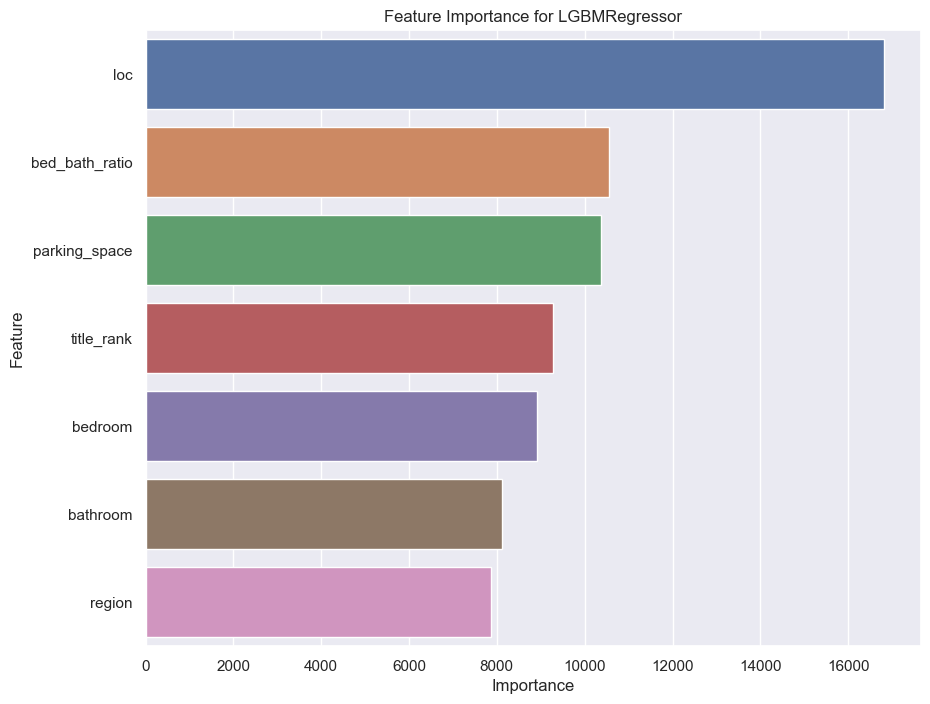

In [8]:
lgbm_preds = fold_fit_score(
    lgb_model,
    X,
    y,
    X_test,
    15,
    transform_func=np.log1p,
    inverse_transform_func=np.expm1,
    plot_feat_imp=True,
)

In [9]:
sample_sub = pd.read_csv('data/Sample_submission.csv')
print(sample_sub.shape)

sample_sub["price"] = np.mean(lgbm_preds, axis=0)
sample_sub.to_csv(
    "submissions/lgbm_regressor_tuned_kfold_15_log_transformed_feat_eng_optuna.csv", index=False
)
sample_sub.head()

(6000, 1)


,ID,price
0,845,2.292717e+06
1,1924,1.029341e+06
2,10718,1.186492e+06
3,12076,8.785686e+06
4,12254,1.901197e+06
